In [1]:
import xarray as xr

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from scipy import stats

import math

# font size for plots
SMALL_SIZE = 8
BIGGER_SIZE = 12
plt.rc('font', size=  BIGGER_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rcParams["font.family"] = "serif"


#=================================================================================



ymin = -80.
ymax =  80.
var = 'tang'
ylabel = "Tangential Acceleration"


ymin =   0.
ymax =  80.
var = 'curv'
ylabel = "Curvature Acceleration"



ymin =   0.
ymax =  80.
#speed
var = 'speed'
ylabel = "Translation Speed"

#=================================================================================

mon = '_ASO_'
monTitle = '[August-October]'

mon = '_JAS_'
monTitle = '[July-September]'


mon = '_ALL_'
monTitle = '[All Months]'



mon = '_JASO_'
monTitle = '[July-October]'





mon = '_AS_'
monTitle = '[August-September]'


#=================================================================================

dom = '20_40'
titleString1 = '(b) Atlantic: 20-40N ' + monTitle
titleString2 = '(d) Atlantic: 20-40N ' + monTitle



dom = '20_45'
titleString1 = '(b) Atlantic: 20-45N ' + monTitle
titleString2 = '(d) Atlantic: 20-45N ' + monTitle


dom = '25_45'
titleString1 = '(b) Atlantic: 25-45N ' + monTitle
titleString2 = '(d) Atlantic: 25-45N ' + monTitle





dom = '0_90'
titleString1 = '(a) Entire Atlantic ' + monTitle 
titleString2 = '(b) Entire Atlantic ' + monTitle 

# for JASO
dom = '20_50'
titleString1 = '(c) Atlantic: 20-50N ' + monTitle
titleString2 = '(d) Atlantic: 20-50N ' + monTitle



#for AS
dom = '20_50'
titleString1 = '(e) Atlantic: 20-50N ' + monTitle
titleString2 = '(f) Atlantic: 20-50N ' + monTitle


#=================================================================================
fileName = var+mon + dom+".nc"
output1 = "scatter_" + var+ mon +dom+".png"
output2 = "beta_" + var+ mon +dom+".png"
xlabelString = "Quantiles of Conditional " + ylabel
npfileName = "np_" + var+ mon +dom+".txt"

fileName = "../dat.nc"
print(fileName)

../dat.nc


In [2]:
#open the data set
ds = xr.open_dataset(fileName)
print(ds)

<xarray.Dataset>
Dimensions:    (ncl0: 1, ncl1: 1, ncl2: 1, ncl3: 1, ncl5: 21873, ncl6: 21873, ncl7: 54, ncl8: 54, storm: 21873)
Dimensions without coordinates: ncl0, ncl1, ncl2, ncl3, ncl5, ncl6, ncl7, ncl8, storm
Data variables:
    startYear  (ncl0) int32 ...
    endYear    (ncl1) int32 ...
    latS       (ncl2) float32 ...
    latN       (ncl3) float32 ...
    Dates      (storm) datetime64[ns] ...
    Data       (ncl5) float64 ...
    Fracyear   (ncl6) float32 ...
    years      (ncl7) float32 ...
    yearly     (ncl8) float64 ...


In [3]:
print(ds.latS)
print(ds.latN)

<xarray.DataArray 'latS' (ncl2: 1)>
array([20.], dtype=float32)
Dimensions without coordinates: ncl2
<xarray.DataArray 'latN' (ncl3: 1)>
array([90.], dtype=float32)
Dimensions without coordinates: ncl3


In [4]:
# now lets read the yearly averaged data and establish some basic trend using OLS = this is the trend of the mean
#
yData  = ds.yearly
years  = ds.years
dfA = pd.DataFrame({'years':years, 'yData':yData, 'const':1})
reg1 = sm.OLS(endog=dfA['yData'], exog=dfA[['const', 'years']],missing='drop')
results = reg1.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  yData   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                   0.06946
Date:                Mon, 07 Dec 2020   Prob (F-statistic):              0.793
Time:                        11:25:15   Log-Likelihood:                -102.89
No. Observations:                  54   AIC:                             209.8
Df Residuals:                      52   BIC:                             213.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0760     28.838     -0.141      0.8

In [5]:
#plt.plot(years, accel, color='grey',markersize=1)


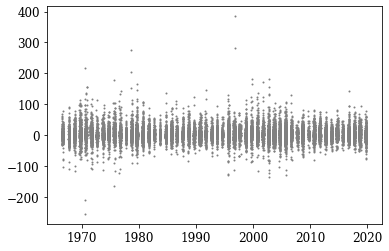

In [6]:

Data  = ds.Data
Time  = ds.Fracyear
plt.plot(Time, Data,'o', color='grey',markersize=1)


In [7]:
# Linear regression using numpy
slope, intercept, r_value, p_value, std_err = stats.linregress(Time.values,Data.values)
print("R-squared : %f" % r_value**2)
print ("slope    : %f" % slope)
print ("p value  : %f" % p_value)
print ("intercept  : %f" % intercept)


R-squared : 0.000020
slope    : 0.005822
p value  : 0.510541
intercept  : -8.121531


In [8]:
# Linear regression using numpy

# the time is in fractional year. What if we just assign all values to an integer year index?
#
xdat = [math.floor(float(i)) for i in Time.values]

slope, intercept, r_value, p_value, std_err = stats.linregress(xdat,Data.values)
print("R-squared : %f" % r_value**2)
print ("slope    : %f" % slope)
print ("p value  : %f" % p_value)
print ("intercept  : %f" % intercept)

#notes: the difference between the previous cell and this is small

R-squared : 0.000019
slope    : 0.005637
p value  : 0.524096
intercept  : -7.747633


In [9]:
# Now on to QR
#
# use the time and data to create a pandas dataframe

df = pd.DataFrame({'Time':Time, 'Data':Data})

#standardize the acceleration values
#df.iloc[:,1:2] = df.iloc[:,1:2].apply(lambda x: (x-x.mean())/ x.std()
#stddev = df.iloc[:,1].std()
#print(stddev)
#df.iloc[:,1] = (df.iloc[:,1]-df.iloc[:,1].mean())/df.iloc[:,1].std()
# we could convert fractional year to just year by using the xdat that was created using the floor function
# i.e. all points in a year (e.g. 2001) will be assigned the time = 2001.
#df = pd.DataFrame({'Time':xdat, 'Data':Data})

# Notes: I tested the outcome of keeping the fractional year versus the integer year (floor). The differences were minute
# so, either should be fine

#print(df.iloc[:,1].mean())
#print(df.iloc[:,1].std())



In [10]:
# A frst order polynomial fit to get the linear regression
poly = smf.ols(formula='Data ~ 1 +  Time', data=df).fit()
print (poly.summary())


                            OLS Regression Results                            
Dep. Variable:                   Data   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4330
Date:                Mon, 07 Dec 2020   Prob (F-statistic):              0.511
Time:                        11:25:15   Log-Likelihood:                -97787.
No. Observations:               21873   AIC:                         1.956e+05
Df Residuals:                   21871   BIC:                         1.956e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.1215     17.642     -0.460      0.6

In [11]:
mod = smf.quantreg('Data ~ Time', df)
result = mod.fit(q=.50)
print(result.summary())
#print (dir(res))

print(result.pvalues['Time'])
print(result.params['Time'])

                         QuantReg Regression Results                          
Dep. Variable:                   Data   Pseudo R-squared:            0.0005351
Model:                       QuantReg   Bandwidth:                       2.317
Method:                 Least Squares   Sparsity:                        28.09
Date:                Mon, 07 Dec 2020   No. Observations:                21873
Time:                        11:25:16   Df Residuals:                    21871
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -57.5138     11.713     -4.910      0.000     -80.472     -34.555
Time           0.0297      0.006      5.047      0.000       0.018       0.041

The condition number is large, 2.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.


In [12]:
#quantiles = np.arange(.05,.96, .05)

quantiles = [0.05,.10,.15,.2,.3,.5,.7,.8,.85,.90,.95]


def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'],res.params['Time'], res.pvalues['Time']] + \
            res.conf_int().loc['Time'].tolist()
   
        
models = [fit_model(x1) for x1 in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'p', 'lb', 'ub'])
np.savetxt(npfileName, models[["q","b","p","lb","ub"]], fmt='%1.2f & %1.3f & %1.3f &  [ %1.3f, %1.3f ] \\')


In [13]:
quantiles = np.arange(.05,.96, .05)

#quantiles = [0.05,.10,.15,.2,.5,.7,.8,.85,.90,.95]


def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'],res.params['Time'], res.pvalues['Time']] + \
            res.conf_int().loc['Time'].tolist()
   
        
models = [fit_model(x1) for x1 in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'p', 'lb', 'ub'])

print(models.round(4))


/home/anant/anaconda3/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


       q         a       b       p      lb      ub
0   0.05 -170.1242  0.0724  0.0020  0.0266  0.1183
1   0.10  -95.4695  0.0393  0.0130  0.0083  0.0704
2   0.15  -17.9425  0.0029  0.8049 -0.0204  0.0263
3   0.20   -7.0657 -0.0008  0.9304 -0.0199  0.0182
4   0.25   -5.8406 -0.0002  0.9788 -0.0150  0.0146
5   0.30  -13.3088  0.0045  0.5534 -0.0104  0.0195
6   0.35  -22.9405  0.0103  0.1569 -0.0040  0.0247
7   0.40  -23.0449  0.0113  0.0262  0.0013  0.0212
8   0.45  -21.7990  0.0110  0.0274  0.0012  0.0208
9   0.50  -57.5138  0.0297  0.0000  0.0181  0.0412
10  0.55  -61.1828  0.0323  0.0000  0.0188  0.0459
11  0.60  -50.3713  0.0277  0.0001  0.0139  0.0415
12  0.65  -53.9946  0.0305  0.0001  0.0154  0.0455
13  0.70  -45.8971  0.0275  0.0023  0.0098  0.0452
14  0.75  -48.2420  0.0300  0.0055  0.0088  0.0512
15  0.80  -25.8951  0.0204  0.0843 -0.0028  0.0436
16  0.85   11.9727  0.0037  0.8022 -0.0253  0.0327
17  0.90   98.3207 -0.0364  0.0540 -0.0735  0.0006
18  0.95  332.6694 -0.1479  0.0

In [14]:
# Least square estimate of the trend of the mean

ols = smf.ols(formula='Data ~ Time', data=df).fit()
ols_ci = ols.conf_int().loc['Time'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['Time'],
           lb = ols_ci[0],
           ub = ols_ci[1],
           p=ols.pvalues['Time'])
print(ols)


{'a': -8.121531819482922, 'b': 0.005822106832839761, 'lb': -0.0115207945940179, 'ub': 0.023165008259697424, 'p': 0.510540532615207}


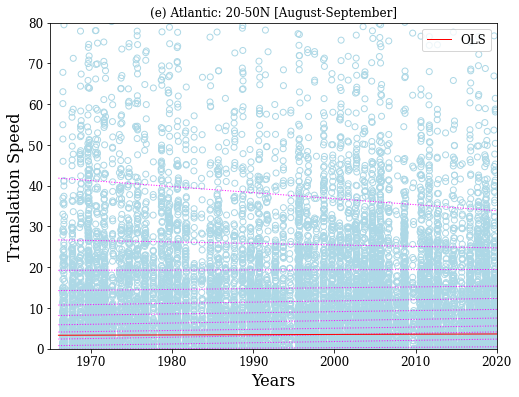

In [15]:
#x = np.arange(df.years.min(), df.years.max(), 50)

x = np.arange(1966,2021,1)

get_y = lambda a, b: a + b * x

n = 9
colors = pl.cm.jet(np.linspace(0,1,n))

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', linewidth=1, color='magenta')    
    
y = get_y(ols['a'], ols['b'])



ecolor = "lightblue"
ax.scatter(df.Time, df.Data, facecolors='none', edgecolors=ecolor) #, s=2 ,alpha=.7)
ax.plot(x, y, color='red', linewidth=1, label='OLS')
ax.set_xlim((1965,2020))
ax.set_ylim((ymin,ymax))
legend = ax.legend()
ax.set_xlabel('Years', fontsize=16)
ax.set_ylabel(ylabel, fontsize=16);
plt.title(titleString1)

plt.savefig(output1)


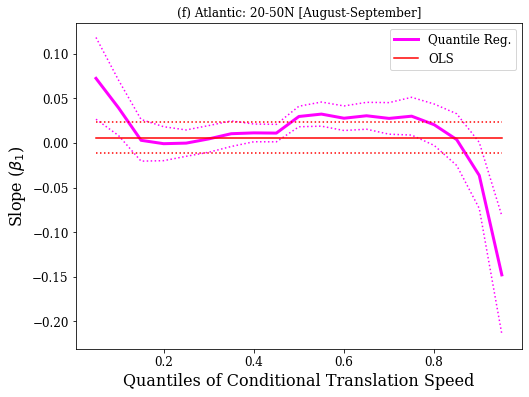

In [16]:
n = models.shape[0]
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(models.q, models.b,     color='magenta', linewidth=3, label='Quantile Reg.')
ax.plot(models.q, models.ub, linestyle='dotted', color='magenta')
ax.plot(models.q, models.lb, linestyle='dotted', color='magenta')

ax.plot(models.q, [ols['b']] * n, color='red', label='OLS')
ax.plot(models.q, [ols['lb']] * n, linestyle='dotted', color='red')
ax.plot(models.q, [ols['ub']] * n, linestyle='dotted', color='red')
legend = ax.legend()
ax.set_xlabel(xlabelString, fontsize=16)
ax.set_ylabel('Slope (' + r'$\beta_1$' +')', fontsize=16);
plt.title(titleString2)

plt.savefig(output2)


In [17]:
inter = 367.7540
slope = -0.1639

ydat = inter + slope*2019
print (ydat)

36.83990000000006
